# This notebook attempts a quick sentiment exploration using VADER.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## Quick Trial on Untouched Data

In [2]:
# Bring in the csv files
csv1 = pd.read_csv('~/Documents/big_data/articles1.csv')
csv2 = pd.read_csv('~/Documents/big_data/articles2.csv')
csv3 = pd.read_csv('~/Documents/big_data/articles3.csv')

In [3]:
# Grab just one article. The first one is fine.
test_article = csv1.loc[0, "content"]

# Create an analyzer
analyzer = SentimentIntensityAnalyzer()

# Give the analyzer the test article
test_sentiment = analyzer.polarity_scores(test_article)

In [4]:
test_sentiment

{'neg': 0.105, 'neu': 0.788, 'pos': 0.108, 'compound': 0.3137}

In [5]:
# Okay...let's send every single article in csv1 through the sentiment analyzer and see what happens.
sentiments_csv1 = pd.DataFrame({"id":csv1['id'], "neg":" ", "neu":" ", "pos":" ", "compound":" "})
for i in range(len(sentiments_csv1['id'])):
    article = csv1.loc[i, 'content']
    sent = analyzer.polarity_scores(article)
    sentiments_csv1.loc[i, 'neg'] = float(sent['neg'])
    sentiments_csv1.loc[i, 'neu'] = float(sent['neu'])
    sentiments_csv1.loc[i, 'pos'] = float(sent['pos'])
    sentiments_csv1.loc[i, 'compound'] = float(sent['compound'])

In [6]:
# Take a gander at a summary of each column
sentiments_csv1['neg'] = sentiments_csv1['neg'].astype(float)
sentiments_csv1['neu'] = sentiments_csv1['neu'].astype(float)
sentiments_csv1['pos'] = sentiments_csv1['pos'].astype(float)
sentiments_csv1['compound'] = sentiments_csv1['compound'].astype(float)

sentiments_csv1.describe()
sentiments_csv1.to_csv('sentiments_csv1')

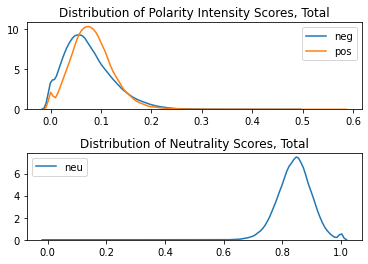

In [7]:
plt.subplot(2,1,1)
plt.title('Distribution of Polarity Intensity Scores, Total')
sns.kdeplot(sentiments_csv1["neg"])
sns.kdeplot(sentiments_csv1["pos"])
plt.subplot(2,1,2)
sns.kdeplot(sentiments_csv1["neu"])
plt.title('Distribution of Neutrality Scores, Total')
plt.subplots_adjust(hspace = 0.5)
plt.show();

Most of the articles score highest in the neutral area. Positivity and negativity are very similarly distributed.

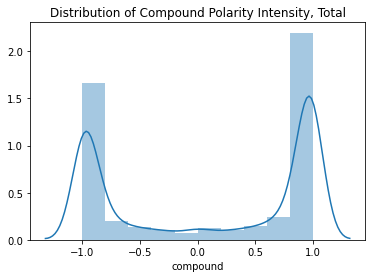

In [8]:
sns.distplot(sentiments_csv1['compound'], bins=10)
plt.title('Distribution of Compound Polarity Intensity, Total')
plt.show();

The compound scores are heavily concentrated at the two ends.

In [9]:
csv1['publication'].unique()

array(['New York Times', 'Breitbart', 'CNN', 'Business Insider',
       'Atlantic'], dtype=object)

In [10]:
nyt = csv1[csv1['publication'] == 'New York Times']
breitbart = csv1[csv1['publication'] == 'Breitbart']

nyt_sent = nyt.merge(sentiments_csv1, on='id')
breitbart_sent = breitbart.merge(sentiments_csv1, on='id')

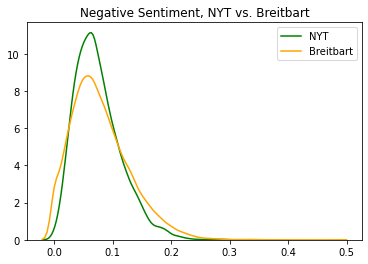

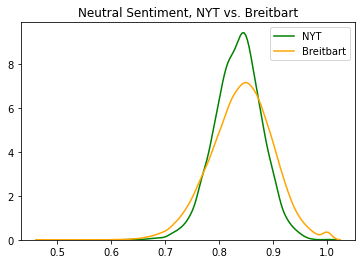

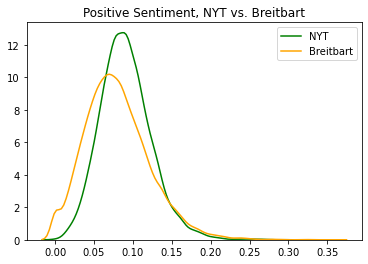

In [11]:
sns.kdeplot(nyt_sent['neg'], label='NYT', color='green')
sns.kdeplot(breitbart_sent['neg'], label="Breitbart", color='orange')
plt.title('Negative Sentiment, NYT vs. Breitbart')
plt.show();
sns.kdeplot(nyt_sent['neu'], label='NYT', color='green')
sns.kdeplot(breitbart_sent['neu'], label="Breitbart", color='orange')
plt.title('Neutral Sentiment, NYT vs. Breitbart')
plt.show();
sns.kdeplot(nyt_sent['pos'], label='NYT', color='green')
sns.kdeplot(breitbart_sent['pos'], label="Breitbart", color='orange')
plt.title('Positive Sentiment, NYT vs. Breitbart')
plt.show();

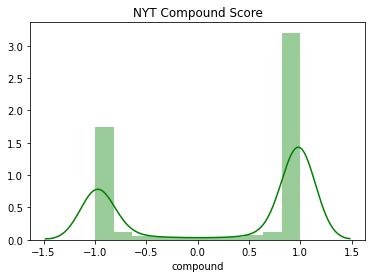

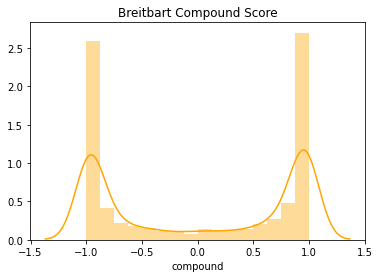

In [12]:
sns.distplot(nyt_sent['compound'], label='NYT', color='green')
plt.title('NYT Compound Score')
plt.show();
sns.distplot(breitbart_sent['compound'], label="Breitbart", color='orange')
plt.title('Breitbart Compound Score')
plt.show();

In [13]:
csv1['date'] = pd.to_datetime(csv1['date'])

In [14]:
test_list = csv1.loc[0,'content']
test_list = re.split("(?<!Mr|Ms)(?<!Mrs)(?<![A-Z+])[.]", test_list)

In [15]:
art0_sent = pd.DataFrame({"sentence":test_list, "neg":0, "neu":0, "pos":0, "compound":0})
for i in range(len(test_list)):
    sentence = test_list[i]
    sent = analyzer.polarity_scores(sentence)
    art0_sent.loc[i, 'neg'] = float(sent['neg'])
    art0_sent.loc[i, 'neu'] = float(sent['neu'])
    art0_sent.loc[i, 'pos'] = float(sent['pos'])
    art0_sent.loc[i, 'compound'] = float(sent['compound'])
    
art0_sent = art0_sent.drop(27, axis=0)

In [16]:
art0_sent

,sentence,neg,neu,pos,compound
0,WASHINGTON — Congressional Republicans have...,0.164,0.611,0.225,0.4404
1,The incoming Trump administration could choos...,0.051,0.888,0.061,-0.1531
2,But a sudden loss of the disputed subsidies c...,0.149,0.688,0.163,0.1531
3,That could lead to chaos in the insurance mar...,0.132,0.747,0.121,-0.0772
4,"To stave off that outcome, Republicans could ...",0.142,0.742,0.117,-0.0516
5,"In another twist, Donald J. Trump’s administr...",0.217,0.783,0.000,-0.7579
6,"Eager to avoid an ugly political pileup, Repu...",0.159,0.753,0.089,-0.4939
7,They are not yet ready to divulge their strategy,0.209,0.791,0.000,-0.2755
8,“Given that this pending litigation involves ...,0.062,0.938,0.000,-0.2023
9,"“Upon taking office, the Trump administration...",0.000,0.849,0.151,0.4939


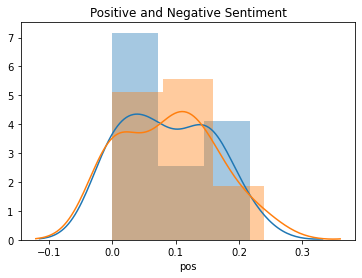

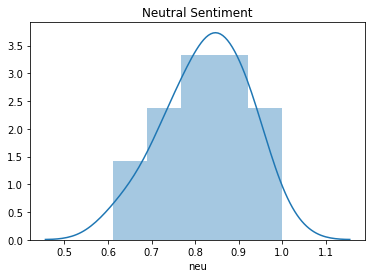

In [17]:
sns.distplot(art0_sent['neg'])
sns.distplot(art0_sent['pos'])
plt.title('Positive and Negative Sentiment')
plt.show();

sns.distplot(art0_sent['neu'])
plt.title('Neutral Sentiment')
plt.show();

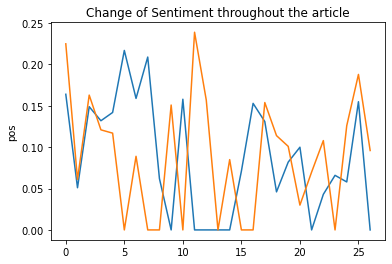

In [18]:
sns.lineplot(x=range(len(art0_sent)), y='neg', data=art0_sent)
sns.lineplot(x=range(len(art0_sent)), y='pos', data=art0_sent)
plt.title('Change of Sentiment throughout the article')
plt.show();

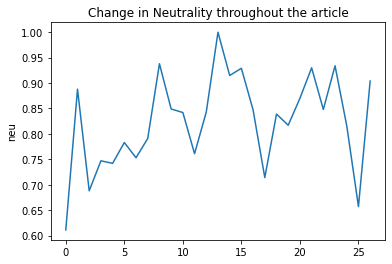

In [19]:
sns.lineplot(x=range(len(art0_sent)), y='neu', data=art0_sent)
plt.title('Change in Neutrality throughout the article')
plt.show();

In [20]:
sentiments_csv1['publication'] = csv1['publication']
mean_sent_csv1 = sentiments_csv1.drop('id',axis=1).groupby('publication').mean()
mean_sent_csv1

,neg,neu,pos,compound
publication,,,,
Atlantic,0.077088,0.817018,0.105942,0.462896
Breitbart,0.078764,0.841342,0.079891,0.025619
Business Insider,0.053700,0.871978,0.074318,0.258300
CNN,0.079397,0.834136,0.086202,0.090624
New York Times,0.074747,0.834488,0.090770,0.264713


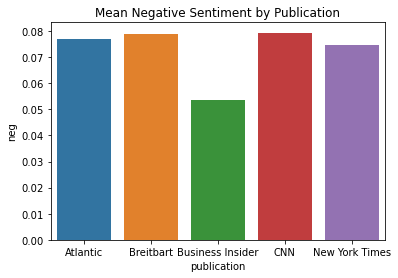

In [21]:
sns.barplot(x=mean_sent_csv1.index, y='neg', data=mean_sent_csv1)
plt.title('Mean Negative Sentiment by Publication')
plt.show();

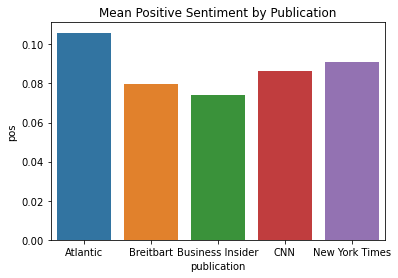

In [22]:
sns.barplot(x=mean_sent_csv1.index, y='pos', data=mean_sent_csv1)
plt.title('Mean Positive Sentiment by Publication')
plt.show();

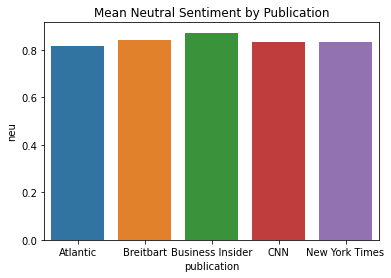

In [23]:
sns.barplot(x=mean_sent_csv1.index, y='neu', data=mean_sent_csv1)
plt.title('Mean Neutral Sentiment by Publication')
plt.show();

In [24]:
publishers = sentiments_csv1['publication'].unique()
publishers

array(['New York Times', 'Breitbart', 'CNN', 'Business Insider',
       'Atlantic'], dtype=object)

In [25]:
for publisher in publishers:
    sentiments_csv1[publisher] = -1
    i = 0
    for i in range(sentiments_csv1.shape[0]):
        if sentiments_csv1.loc[i, 'publication'] == publisher:
            sentiments_csv1.loc[i, publisher] = 1

In [26]:
sentiments_csv1

,id,neg,neu,pos,compound,publication,New York Times,Breitbart,CNN,Business Insider,Atlantic
0,17283,0.105,0.788,0.108,0.3137,New York Times,1,-1,-1,-1,-1
1,17284,0.153,0.792,0.055,-1.0000,New York Times,1,-1,-1,-1,-1
2,17285,0.072,0.833,0.094,0.9960,New York Times,1,-1,-1,-1,-1
3,17286,0.109,0.777,0.114,0.8939,New York Times,1,-1,-1,-1,-1
4,17287,0.043,0.872,0.085,0.9864,New York Times,1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...
49995,73465,0.059,0.839,0.102,0.9926,Atlantic,-1,-1,-1,-1,1
49996,73466,0.082,0.802,0.117,0.9892,Atlantic,-1,-1,-1,-1,1
49997,73467,0.051,0.858,0.092,0.9999,Atlantic,-1,-1,-1,-1,1
49998,73468,0.045,0.896,0.059,0.9169,Atlantic,-1,-1,-1,-1,1


In [27]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('neu ~ C(publication)', data=sentiments_csv1).fit()
table = sm.stats.anova_lm(model)
print(table)

                     df      sum_sq   mean_sq           F  PR(>F)
C(publication)      4.0    7.317600  1.829400  591.726986     0.0
Residual        49995.0  154.565975  0.003092         NaN     NaN


In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    neu   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     591.7
Date:                Fri, 11 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:25:10   Log-Likelihood:                 73532.
No. Observations:               50000   AIC:                        -1.471e+05
Df Residuals:                   49995   BIC:                        -1.470e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              0.8170      0.004    192.148      0.000       0.809       0.825
C(publication)[T.Breitbart]            0.0243      0.004      5.700      0.000       0.016       0.033
C(publication)[T.Business Insider]     0.0550      0.004     12.765      0.000       0.047       0.063
C(publication)[T.CNN]                  0.0171      0.004      3.996      0.000       0.009       0.026
C(publication)[T.New York Times]       0.0175      0.004      4.064      0.000       0.009       0.026
==============================================================================
Omnibus:                     5304.901   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27518.197
Skew:                          -0.391   Prob(JB):                         0.00
Kurtosis:                       6.549   Cond. No.                         44.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
model = ols('neg ~ C(publication)', data=sentiments_csv1).fit()
table = sm.stats.anova_lm(model)
print(table)

                     df      sum_sq   mean_sq           F  PR(>F)
C(publication)      4.0    3.625231  0.906308  404.786038     0.0
Residual        49995.0  111.937802  0.002239         NaN     NaN


In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    neg   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     404.8
Date:                Fri, 11 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:25:10   Log-Likelihood:                 81599.
No. Observations:               50000   AIC:                        -1.632e+05
Df Residuals:                   49995   BIC:                        -1.631e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              0.0771      0.004     21.304      0.000       0.070       0.084
C(publication)[T.Breitbart]            0.0017      0.004      0.462      0.644      -0.005       0.009
C(publication)[T.Business Insider]    -0.0234      0.004     -6.383      0.000      -0.031      -0.016
C(publication)[T.CNN]                  0.0023      0.004      0.634      0.526      -0.005       0.009
C(publication)[T.New York Times]      -0.0023      0.004     -0.640      0.522      -0.010       0.005
==============================================================================
Omnibus:                     6825.410   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11411.462
Skew:                           0.928   Prob(JB):                         0.00
Kurtosis:                       4.427   Cond. No.                         44.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
model = ols('pos ~ C(publication)', data=sentiments_csv1).fit()
table = sm.stats.anova_lm(model)
print(table)

                     df     sum_sq   mean_sq           F         PR(>F)
C(publication)      4.0   1.398424  0.349606  207.309717  1.051141e-176
Residual        49995.0  84.311296  0.001686         NaN            NaN


In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pos   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     207.3
Date:                Fri, 11 Dec 2020   Prob (F-statistic):          1.05e-176
Time:                        20:25:10   Log-Likelihood:                 88685.
No. Observations:               50000   AIC:                        -1.774e+05
Df Residuals:                   49995   BIC:                        -1.773e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              0.1059      0.003     33.735      0.000       0.100       0.112
C(publication)[T.Breitbart]           -0.0261      0.003     -8.266      0.000      -0.032      -0.020
C(publication)[T.Business Insider]    -0.0316      0.003     -9.945      0.000      -0.038      -0.025
C(publication)[T.CNN]                 -0.0197      0.003     -6.239      0.000      -0.026      -0.014
C(publication)[T.New York Times]      -0.0152      0.003     -4.779      0.000      -0.021      -0.009
==============================================================================
Omnibus:                     6636.282   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15040.339
Skew:                           0.791   Prob(JB):                         0.00
Kurtosis:                       5.171   Cond. No.                         44.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
model = ols('compound ~ C(publication)', data=sentiments_csv1).fit()
table = sm.stats.anova_lm(model)
print(table)

                     df        sum_sq     mean_sq           F         PR(>F)
C(publication)      4.0    530.277896  132.569474  174.598028  8.587488e-149
Residual        49995.0  37960.399268    0.759284         NaN            NaN


In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               compound   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     174.6
Date:                Fri, 11 Dec 2020   Prob (F-statistic):          8.59e-149
Time:                        20:25:10   Log-Likelihood:                -64060.
No. Observations:               50000   AIC:                         1.281e+05
Df Residuals:                   49995   BIC:                         1.282e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              0.4629      0.067      6.947      0.000       0.332       0.594
C(publication)[T.Breitbart]           -0.4373      0.067     -6.539      0.000      -0.568      -0.306
C(publication)[T.Business Insider]    -0.2046      0.067     -3.032      0.002      -0.337      -0.072
C(publication)[T.CNN]                 -0.3723      0.067     -5.546      0.000      -0.504      -0.241
C(publication)[T.New York Times]      -0.1982      0.067     -2.942      0.003      -0.330      -0.066
==============================================================================
Omnibus:                   204999.737   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6827.501
Skew:                          -0.233   Prob(JB):                         0.00
Kurtosis:                       1.251   Cond. No.                         44.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Go through the articles sentence-by-sentence and find the sentiment score.

VADER is designed to predict the sentiment of short statements, like tweets. So we should get a better idea of the total sentiment of an article by analyzing the sentences and then combining the sentiment.

In [35]:
test_list = csv1.loc[0,'content']
test_list = re.split("(?<!Mr|Ms)(?<!Mrs)(?<![A-Z+])[.]", test_list)

art0_sent = pd.DataFrame({"sentence":test_list, "neg":0, "neu":0, "pos":0, "compound":0})
for i in range(len(test_list)):
    sentence = test_list[i]
    sent = analyzer.polarity_scores(sentence)
    art0_sent.loc[i, 'neg'] = float(sent['neg'])
    art0_sent.loc[i, 'neu'] = float(sent['neu'])
    art0_sent.loc[i, 'pos'] = float(sent['pos'])
    art0_sent.loc[i, 'compound'] = float(sent['compound'])
    
art0_sent = art0_sent.drop(27, axis=0)

In [36]:
total_sent = pd.DataFrame(columns=['id', 'neg', 'neu', 'pos', 'compound'])
total_sent.loc[0, 'neg'] = art0_sent['neg'].mean()
total_sent.loc[0, 'neu'] = art0_sent['neu'].mean()
total_sent.loc[0, 'pos'] = art0_sent['pos'].mean()
total_sent.loc[0, 'compound'] = art0_sent['compound'].sum()

In [37]:
total_sent = pd.DataFrame(columns=['id', 'neg', 'neu', 'pos', 'compound'])

In [38]:
for num, article in zip(csv1['id'], csv1['content']):
    temp = re.split("(?<!Mr|Ms)(?<!Mrs)(?<![A-Z+])[.]", article)
    art_sent = pd.DataFrame(columns = ['neg', 'neu', 'pos', 'compound'])
    art_sent
    for i in range(len(temp)):
        sentence = temp[i]
        sent = analyzer.polarity_scores(sentence)
        art_sent.loc[i, 'neg'] = float(sent['neg'])
        art_sent.loc[i, 'neu'] = float(sent['neu'])
        art_sent.loc[i, 'pos'] = float(sent['pos'])
        art_sent.loc[i, 'compound'] = float(sent['compound'])
    temp_sent = pd.DataFrame({'id':num, 'neg':art_sent['neg'].mean(),
                             'neu':art_sent['neu'].mean(), 'pos':art_sent['pos'].mean(),
                             'compound':art_sent['compound'].sum()}, index=np.arange(1))
    total_sent = total_sent.append(temp_sent)

In [39]:
total_sent['normalized'] = total_sent['compound'] / np.abs(total_sent['compound']).max()

In [40]:
total_sent['standard'] = (total_sent['compound'] - total_sent['compound'].mean()) / total_sent['compound'].std()

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1))
scaled = scaler.fit_transform(np.array(total_sent['compound']).reshape(-1,1))

In [42]:
total_sent['scaled'] = scaled
total_sent.to_csv('total_sent_csv1.csv')
total_sent.describe()

,neg,neu,pos,compound,normalized,standard,scaled
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000
mean,0.062036,0.829969,0.067263,0.569501,0.002312,-6.947626e-16,0.285448
std,0.040762,0.070349,0.035020,6.106487,0.024792,1.000000e+00,0.031795
min,0.000000,0.000000,0.000000,-246.307900,-1.000000,-4.042871e+01,-1.000000
25%,0.032476,0.795282,0.043444,-1.890275,-0.007674,-4.028136e-01,0.272640
50%,0.055486,0.837087,0.064261,0.442850,0.001798,-2.074047e-02,0.284788
75%,0.084706,0.873658,0.087048,2.959200,0.012014,3.913377e-01,0.297890
max,0.519000,1.000000,0.545000,137.803300,0.559476,2.247344e+01,1.000000
